In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import random
import pandas as pd
from random import shuffle
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from itertools import cycle
import time

## Initialize Population

In [3]:
#We create here one chess board of size N
def random_individual(N):
    return random.sample(range(N),len(range(N)))
    
print(random_individual(8))

[2, 3, 4, 1, 0, 5, 7, 6]


In [4]:
#We create here pop_size chess boards of size N
def initialize_pop(N,pop_size):
    pop=[]
    for i in range(pop_size):
        pop.append(random_individual(N))
    return pop
c=initialize_pop(8,8)
c

[[6, 4, 3, 1, 5, 0, 7, 2],
 [6, 4, 2, 5, 3, 0, 1, 7],
 [1, 4, 3, 5, 2, 0, 6, 7],
 [7, 6, 1, 5, 4, 3, 2, 0],
 [7, 3, 5, 0, 4, 2, 6, 1],
 [6, 7, 0, 1, 5, 3, 2, 4],
 [0, 2, 6, 5, 7, 4, 3, 1],
 [6, 5, 4, 0, 7, 1, 2, 3]]

## Evaluate Fitness

In [5]:
#We test the fitness of an individual taking by account only the sum of the diagonals
def individual_fitness(individual):
    N=len(individual)
    if N<3:#Check for exceptions 
        print('There might be an error when calculating individual fitness')
        print(' the length of the individual is smaller than 3')
        print(individual)
        
        
    diag=0.
    for i in range(N-1):
        for j in range(N-1):
            if (int(abs(individual[j]-individual[i]))==int(abs(j-i)) and i is not j):
                diag+=1
                
    return diag


individual_fitness(c[0])

12.0

In [7]:
#We calculate the fitness of a population and we return a sorted array with the fitness and the array
def population_fitness(population):
    performance=[]
    for individual in range(len(population)):
        performance.append([individual_fitness(population[individual]),population[individual]])
    return sorted(performance)
population_fitness(c)


[[6.0, [0, 6, 2, 7, 5, 4, 1, 3]],
 [6.0, [7, 2, 4, 0, 3, 1, 6, 5]],
 [8.0, [6, 7, 2, 4, 0, 5, 1, 3]],
 [8.0, [6, 7, 5, 4, 1, 0, 3, 2]],
 [8.0, [7, 2, 1, 0, 6, 3, 5, 4]],
 [10.0, [0, 2, 6, 3, 5, 1, 7, 4]],
 [10.0, [1, 3, 7, 5, 4, 6, 2, 0]],
 [12.0, [7, 0, 6, 5, 3, 1, 2, 4]]]

In [8]:
def board (ind):
    board=np.zeros((len(ind),len(ind)),dtype=str)
    for index, element in enumerate(ind):
        board[index][element]='Q'
    
    print(board)
board(c[0])

[['' '' '' '' '' '' 'Q' '']
 ['' '' '' '' '' '' '' 'Q']
 ['' '' '' '' '' 'Q' '' '']
 ['' '' '' '' 'Q' '' '' '']
 ['' 'Q' '' '' '' '' '' '']
 ['Q' '' '' '' '' '' '' '']
 ['' '' '' 'Q' '' '' '' '']
 ['' '' 'Q' '' '' '' '' '']]


## Selection

In [9]:
#tournament selection, chooses the strongest number of individuals in the population 
def tournament_selection(pop):
    Ni=len(pop)
    #Nt=int(np.round(Ni/3))#Selects top 3 percent
    Nt=2
    fits=population_fitness(pop)
    
    poplist=list(pop)
    matingpop=[]
    for i in range(0,Nt):
        indx=fits.index(min(fits))
        matingpop.append(poplist[indx])
        
        fits.pop(indx)
        poplist.pop(indx)
        
    return(np.array(matingpop).tolist())

#NB: For tournament selection the strongest Nt number of individuals in the population
#    (best fitness scores, in this case minimums) are selected and added to the mating 
#    population who are subject to crossover and mutation
tournament_selection(c)

[[6, 7, 5, 4, 1, 0, 3, 2], [0, 6, 2, 7, 5, 4, 1, 3]]

In [10]:
#We select two individuals from the population. Biased towards the fitter with replacement
def selectFromPopulation(population):
    pop_performance=population_fitness(population)
    leng=int(np.round(len(pop_performance)-1))
    for i in range(0,int(np.round(leng/4))):
        pop_performance.pop()
    
    #We biase the population and return a sorted list
    for i in range(len(pop_performance)):
        pop_performance[i][0]=(pop_performance[i][0])*random.random()
    
    list=sorted(pop_performance,reverse=False)
    #Selection of the first biased individuals with replacement
    ind1=list[random.randint(0,3)][1]
    

    #Selection of the second biased individual
    for i in range(len(pop_performance)):
        pop_performance[i][0]=pop_performance[i][0]*random.random()
    ind2=list[random.randint(0,3)][1]
    return ind1,ind2
print(population_fitness(c))
selectFromPopulation(c)

[[6.0, [0, 6, 2, 7, 5, 4, 1, 3]], [6.0, [7, 2, 4, 0, 3, 1, 6, 5]], [8.0, [6, 7, 2, 4, 0, 5, 1, 3]], [8.0, [6, 7, 5, 4, 1, 0, 3, 2]], [8.0, [7, 2, 1, 0, 6, 3, 5, 4]], [10.0, [0, 2, 6, 3, 5, 1, 7, 4]], [10.0, [1, 3, 7, 5, 4, 6, 2, 0]], [12.0, [7, 0, 6, 5, 3, 1, 2, 4]]]


([0, 6, 2, 7, 5, 4, 1, 3], [7, 2, 1, 0, 6, 3, 5, 4])

## Crossover



In [11]:
### Crossovers ###
def crossover_pointed(p1,p2):
    Nq=len(p1)
    off=-np.ones(Nq,dtype=int)
    
    #auxiliary copy of the genetic material of p2.
    p2c=list(np.copy(p2))
    
    for i in range(0,Nq):
        ri=random.random()
        #Do we select the position?
        if ri<0.5:
            #genetic material from p1
            off[i]=p1[i]
            
            #ereasing that number in the corresponding postion in p2c
            for col in p2c:
                if p1[i]==col:
                    p2c.remove(col)
                    break
    
    #Completion of the offspring with the genetic material of p2
    for i in range(0,Nq):
        if off[i]==-1:
            off[i]=p2c[0]
            p2c.pop(0)
            
    return(off.tolist())

#NB: One offspring is produced from two parents in this crossover method.
#    The points at which crossover are to occur are based on a probability of 0.5 for every locus for parent 1
#    When the probability criteria is met the value at that locus in parent 1 is stored in the array "off",
#    initially set to a list of -1s. The remainder of the -1s are then replaced with the value corresponding to
#    same position in the parent 2 array. 

#rc=np.arange(8)
#rcp=np.copy(rc)
#np.random.shuffle(rcp)
#print(rc,rcp)
#print(PBC(rc,rcp,8))
#print(rc,rcp)
print(tournament_selection(c))
crossover_pointed(tournament_selection(c)[0],tournament_selection(c)[1])

[[6, 7, 5, 4, 1, 0, 3, 2], [0, 6, 2, 7, 5, 4, 1, 3]]


[6, 0, 7, 4, 5, 1, 3, 2]

In [12]:
population_fitness(c)

[[6.0, [0, 6, 2, 7, 5, 4, 1, 3]],
 [6.0, [7, 2, 4, 0, 3, 1, 6, 5]],
 [8.0, [6, 7, 2, 4, 0, 5, 1, 3]],
 [8.0, [6, 7, 5, 4, 1, 0, 3, 2]],
 [8.0, [7, 2, 1, 0, 6, 3, 5, 4]],
 [10.0, [0, 2, 6, 3, 5, 1, 7, 4]],
 [10.0, [1, 3, 7, 5, 4, 6, 2, 0]],
 [12.0, [7, 0, 6, 5, 3, 1, 2, 4]]]

In [13]:
def next_generation(population):
    next_gen=[]
    size=len(population)
    elite=int(np.round(size/5))
    for i in range(size):
        ind1,ind2=selectFromPopulation(population)
        next_gen.append(crossover_pointed(ind1,ind2))
        
    #We add two brand new individuals to keep it exploratory
    next_gen.pop()
    next_gen.pop()
    next_gen.append(random_individual(len(population[0])))
    next_gen.append(random_individual(len(population[0])))
    return next_gen
next_generation(c)
population_fitness(next_generation(c))

[[6.0, [0, 6, 2, 7, 5, 4, 1, 3]],
 [6.0, [6, 7, 5, 4, 2, 0, 3, 1]],
 [6.0, [7, 2, 5, 0, 4, 1, 6, 3]],
 [8.0, [2, 5, 1, 0, 3, 7, 6, 4]],
 [8.0, [6, 7, 5, 4, 1, 0, 3, 2]],
 [8.0, [7, 2, 0, 5, 6, 3, 1, 4]],
 [12.0, [7, 5, 0, 6, 3, 2, 1, 4]],
 [16.0, [0, 6, 5, 4, 1, 2, 7, 3]]]

## Mutation

In [14]:
def mutation(individual):
    N=len(individual)  
    copy_ind=individual.copy()
    rand1=0
    rand2=0
    while rand1==rand2:
        rand1,rand2=random.sample(range(0, N), 2)
    individual[rand1]=copy_ind[rand2]
    individual[rand2]=copy_ind[rand1]

    return individual
print(c[0])
mutation(c[0])

[6, 7, 5, 4, 1, 0, 3, 2]


[6, 7, 5, 4, 1, 2, 3, 0]

In [15]:
#This generates a new generation with a probability
def mutate_population(population,probability):
    for i in range(len(population)):    
        if random.random()*100<probability:
            population[i]=mutation(population[i])
            if random.random()*100<2*probability:
                population[i]=mutation(population[i])
                if random.random()*100<4*probability:
                    population[i]=mutation(population[i])
                    print('triple mutation')
                    if random.random()*100<8*probability:
                        population[i]=mutation(population[i])
                        print('cuadruple mutation')
                        if random.random()*100<12*probability:
                            population[i]=mutation(population[i])
                            print('quintuple mutation')

    return population

mutate_population(initialize_pop(10,10),20)

[[2, 1, 4, 6, 9, 3, 0, 5, 7, 8],
 [9, 7, 6, 2, 5, 0, 1, 4, 3, 8],
 [4, 0, 5, 3, 7, 6, 1, 2, 8, 9],
 [9, 7, 8, 2, 1, 4, 5, 3, 6, 0],
 [8, 7, 3, 0, 4, 9, 5, 6, 2, 1],
 [7, 4, 2, 9, 0, 5, 8, 1, 3, 6],
 [5, 2, 0, 8, 7, 4, 3, 1, 9, 6],
 [0, 5, 2, 3, 4, 9, 6, 7, 1, 8],
 [7, 3, 2, 4, 1, 6, 0, 9, 8, 5],
 [1, 6, 5, 8, 3, 7, 2, 4, 0, 9]]

## Program

In [25]:
N=20
pop_size=40
mutation_probability=5
number_of_generation=200

In [26]:
tic=time.time()
#We initialize for the first time a population
perf_plot=[]
media_plot=[]
population=initialize_pop(N,pop_size)
for i in range(number_of_generation):
    #Evaluation of the fitness of the pop
    performance=population_fitness(population)
    
    #Information to plot graphics
    perf_plot.append([i,performance[0][0]])
    media_plot.append(np.array([item[0] for item in performance]).mean())
    
    #Create next generation based on crossovers
    population=mutate_population(next_generation(population),mutation_probability)
    
toc=time.time()   
print('The time taken to run {} queens with {} iterations is: {:.2f} s'
     .format(N,number_of_generation,np.abs(toc-tic)))

triple mutation
triple mutation
cuadruple mutation
quintuple mutation
triple mutation
triple mutation
triple mutation
cuadruple mutation
triple mutation
cuadruple mutation
triple mutation
cuadruple mutation
triple mutation
triple mutation
cuadruple mutation
quintuple mutation
triple mutation
The time taken to run 20 queens with 200 iterations is: 45.48 s


<IPython.core.display.Javascript object>


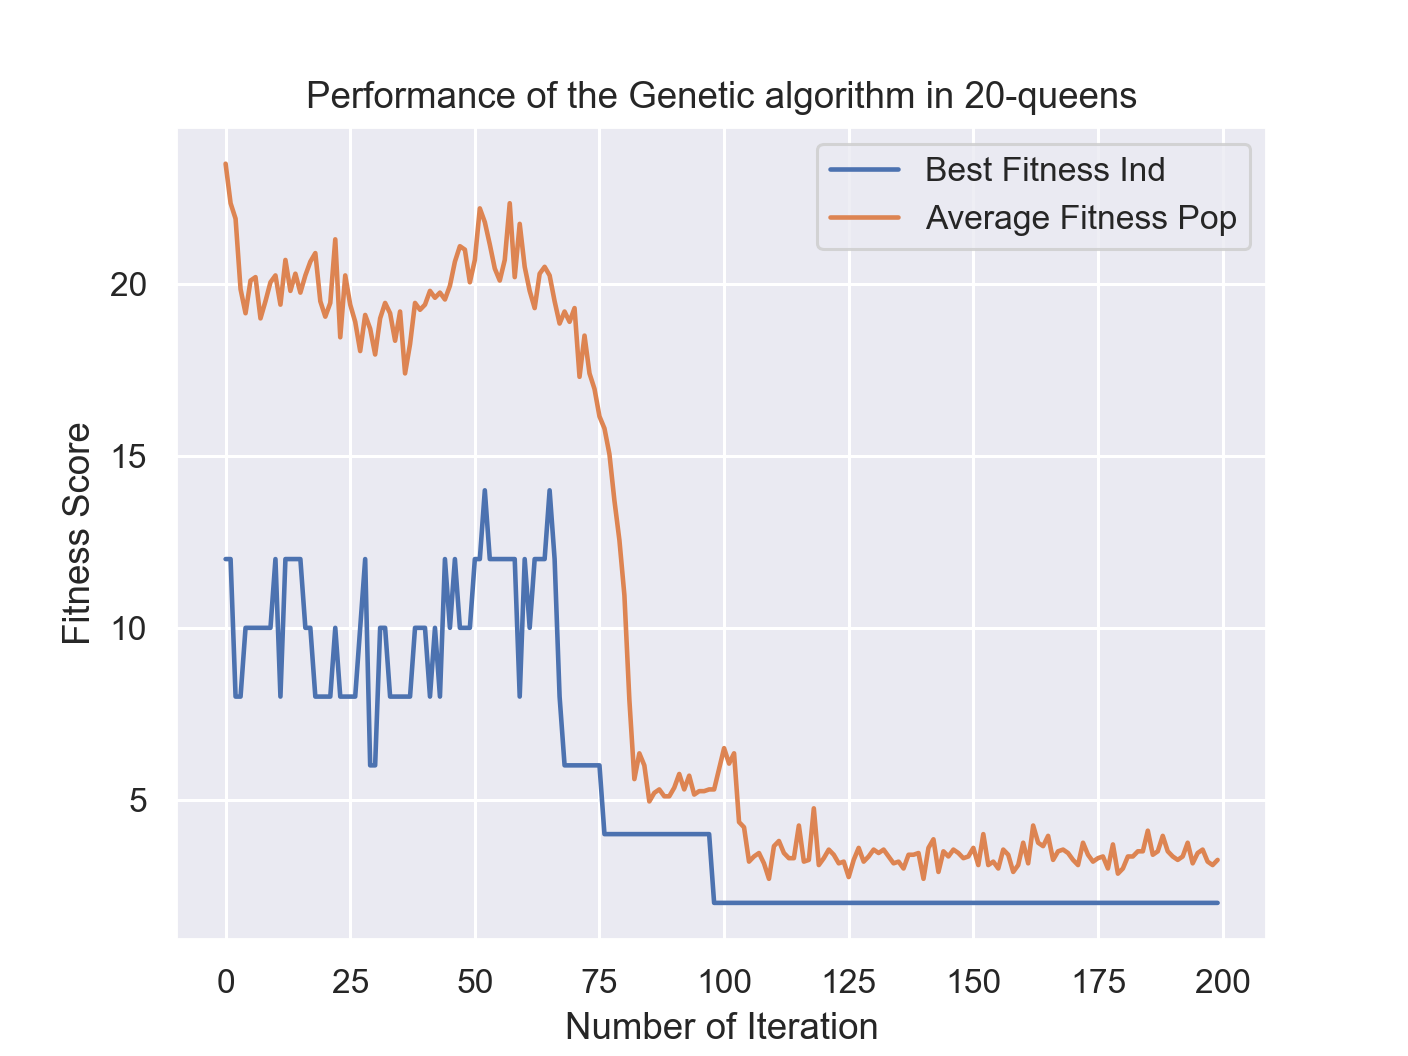

In [27]:
plt.figure()
perf_plot=np.array(perf_plot)
plt.plot(perf_plot[:,0],perf_plot[:,1],label='Best Fitness Ind')
plt.plot(perf_plot[:,0],media_plot,label='Average Fitness Pop')
plt.ylabel('Fitness Score')
plt.xlabel('Number of Iteration')
plt.title('Performance of the Genetic algorithm in {}-queens'.format(N))
plt.legend()
plt.show()